In [26]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Feature 1')

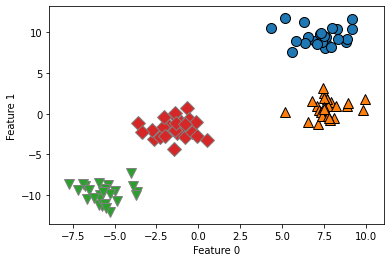

In [27]:
X, y = make_blobs(centers=4, random_state=8)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

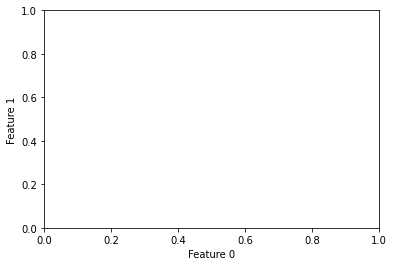

In [28]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X,y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

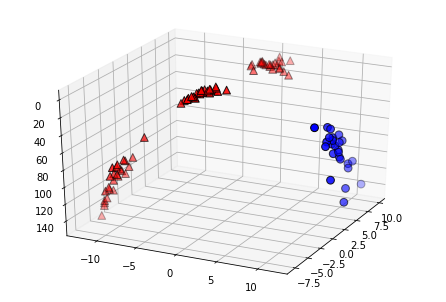

In [31]:
# Add the squared second feature.
X_new = np.hstack([X, X[:, 1:] ** 2])

# Sketching a 3D graph.
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# Plot first all the points with y ==0, then all with y == 1.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60,
          edgecolor='k')

In [39]:
# We can now separate the two lines using a linear model.
linear_svm_3d = LinearSVC(max_iter=100000).fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# Two ways of transforming data into higher dimensions.
# The polynomial trick.

Text(0, 0.5, 'Feature 1')

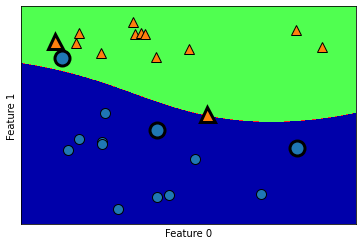

In [41]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_classification(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Plot support vectors
sv = svm.support_vectors_

# Class labels of support vectors are given by the sign of the dual coefficients.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

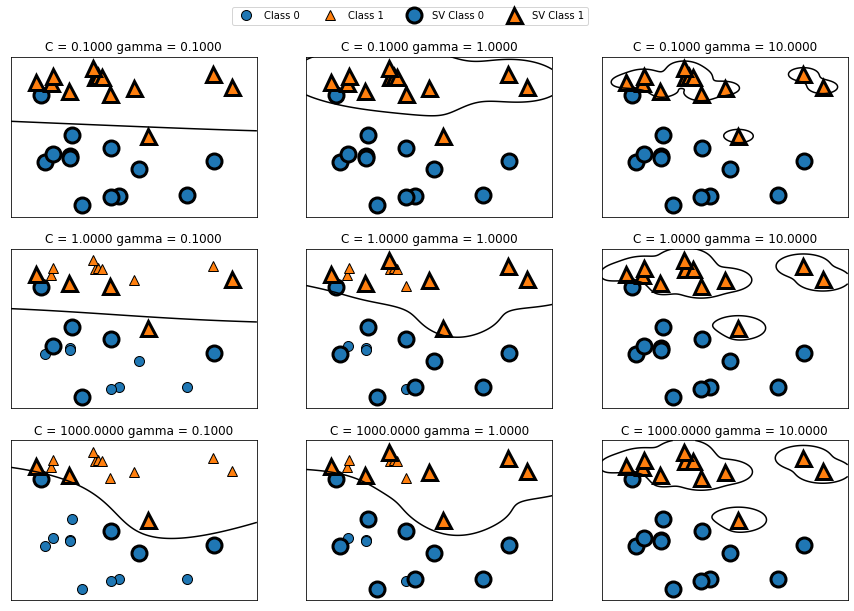

In [48]:
# Let's see what happens when we adjust the parameters.
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["Class 0", "Class 1", "SV Class 0", "SV Class 1"], ncol=4, loc=(.9, 1.2))

In [53]:
# Let's apply the RBF kernel SVM to the Breast Cancer dataset. By default, C=1 and gamma=1/n_features.
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

# Require all the features to vry on a similar scale.

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

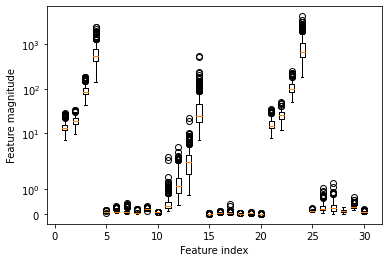

In [55]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [59]:
# Compute the minimum value per feature on the training set.
min_on_training = X_train.min(axis=0)
# Computer the range of each feature in the data set.
range_on_training = (X_train - min_on_training).max(axis=0)

# Substract the min, and divide the range.
# Afterward, min=0 and max=1 for each feature.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

svc = SVC()
svc.fit(X_train_scaled, y_train)

X_test_scaled = (X_test - min_on_training) / range_on_training
print("Accracy on training set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
                                            

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accracy on training set: 0.972
Accuracy on test set: 0.972


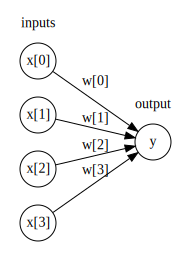

In [62]:
display(mglearn.plots.plot_logistic_regression_graph())

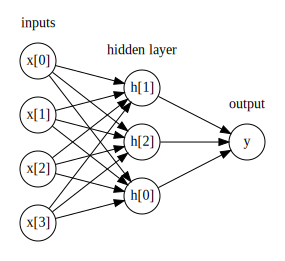

In [63]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x) tanh(x)')

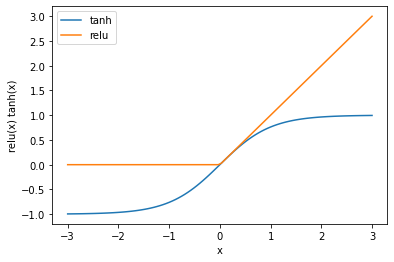

In [64]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x) tanh(x)")

Text(0, 0.5, 'Feature 1')

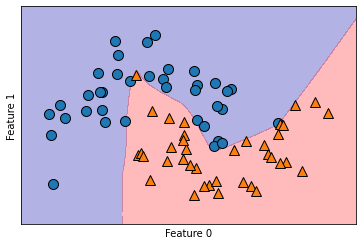

In [66]:
# Using a neural network on the two_moons dataset.
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

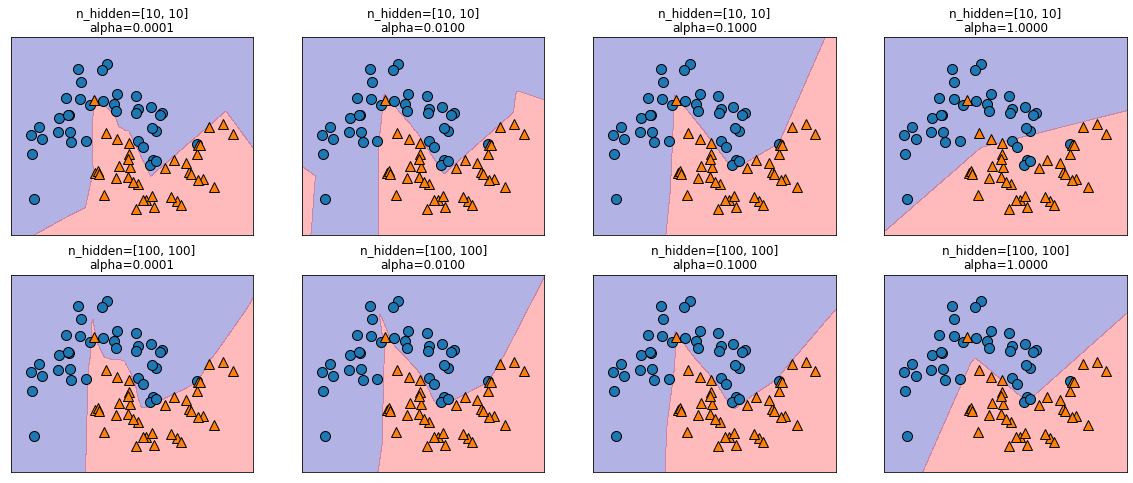

In [68]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha, max_iter=10000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [70]:
# Applying a neural network model to the breast cancer dataset.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=40)
mlp.fit(X_train, y_train)

print("Accuracy on training set:{:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set:{:.2f}".format(mlp.score(X_test, y_test)))

# All data must scale in a similar way.

Accuracy on training set:0.92
Accuracy on test set:0.94


In [73]:
# Calculate mean per feature.
mean_on_train = X_train.mean(axis=0)

# Compute the standard deviation of each feature on the training set.
std_on_train = X_train.std(axis=0)

# Substract the mean, and scale by inverse s.d
X_train_scaled = (X_train - mean_on_train) / std_on_train

X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


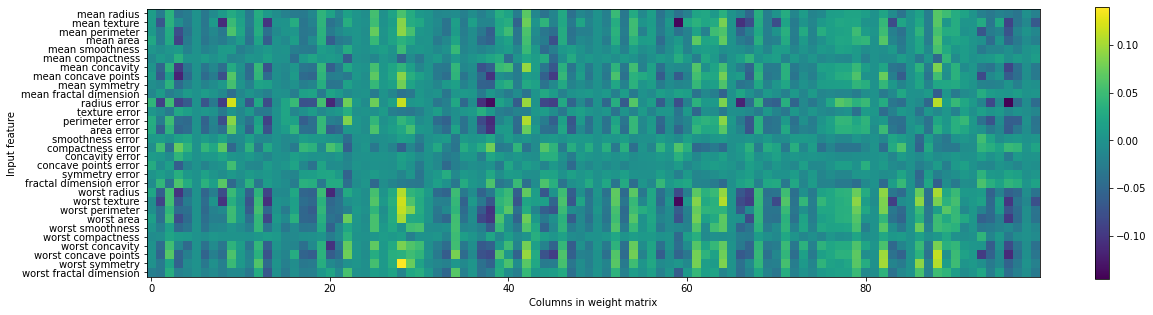

In [75]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# We rename the classes 'blue' and 'red' for illustration purposes
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

print("Decision function:", gbrt.decision_function(X_test)[:6])

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [79]:
print("Thresholded decision function:\n", gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
